In [16]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 220.2 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 479.1 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install matplotlib pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from PIL import Image

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import kmeans


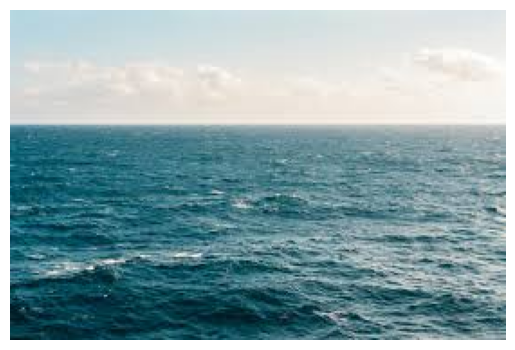

In [10]:
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg'  
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()

In [11]:
import matplotlib.image as img
image = img.imread("C:/Users/Zayan Rashid/Desktop/sea.jpeg")
image.shape

(183, 275, 3)

In [12]:
r=[]
g=[]
b=[]

In [13]:
for row in image:
    for pixel in row:
        temp_r,temp_g,temp_b=pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [14]:
pixels=pd.DataFrame({'red':r,'blue':b,'green':g})
pixels.head()

red  blue  green
0  182   225    216
1  182   225    216
2  181   224    215
3  181   224    215
4  180   223    214

In [15]:
from sklearn.cluster import KMeans

distortions = []
num_clusters = range(1, 11)

for i in num_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)  # Create KMeans instance
    kmeans.fit(pixels[['red', 'blue', 'green']])  # Fit model with correct column names
    distortions.append(kmeans.inertia_)  # Append inertia (distortion)


In [16]:
elbow_plot=pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

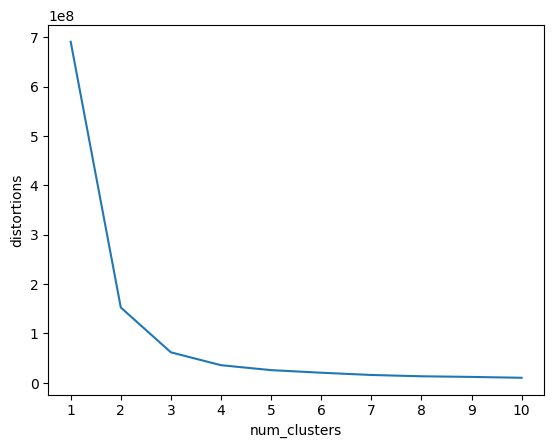

In [17]:
sns.lineplot(x='num_clusters',y='distortions',data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [20]:
import cv2
import numpy as np

# Load the image using OpenCV
image = cv2.imread("C:/Users/Zayan Rashid/Desktop/sea.jpeg")

# Check if the image is loaded correctly
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Print the shape of the image
    print("Image shape:", image.shape)
    
    # Extract color channels (OpenCV loads images in BGR format)
    blue_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    red_channel = image[:, :, 2]
    
    # Optional: Print the shapes of each channel
    print("Red channel shape:", red_channel.shape)
    print("Green channel shape:", green_channel.shape)
    print("Blue channel shape:", blue_channel.shape)


Image shape: (183, 275, 3)
Red channel shape: (183, 275)
Green channel shape: (183, 275)
Blue channel shape: (183, 275)


In [31]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 393.8 kB/s eta 0:01:39
   ---------------------------------------- 0.1/38.8 MB 930.9 kB/s eta 0:00:42
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/38.8 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.5/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.6/38.8 MB 1.8 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.8 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.8/38.8 MB 1.9 MB/s eta 0:00:20
   - -------------------------------------- 1.0/38.8 MB 2.0 MB/s eta 0:00:20
   - -------------------------------------- 1.0/38.8 MB 2.0 MB/s eta 0:00:20
   - ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


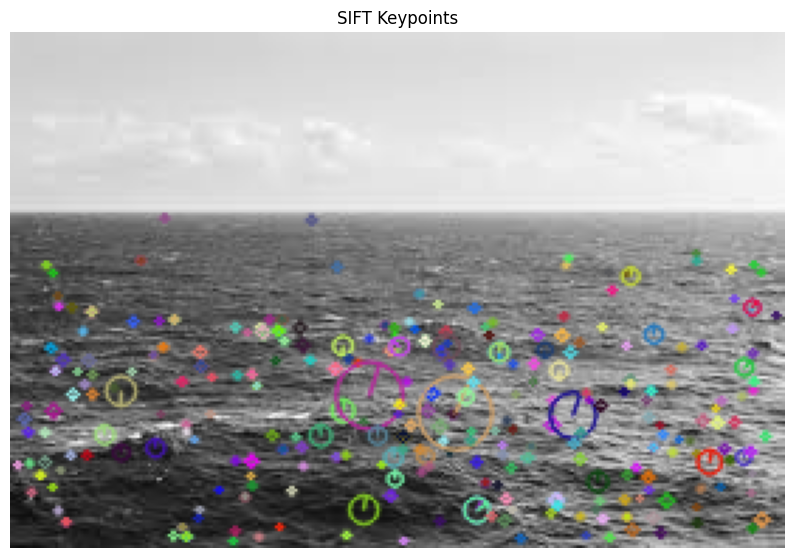

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg'  
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert image to RGB (for displaying with matplotlib)
img_with_keypoints_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

# Plot the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_keypoints_rgb)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


In [33]:
pip install opencv-python-headless numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


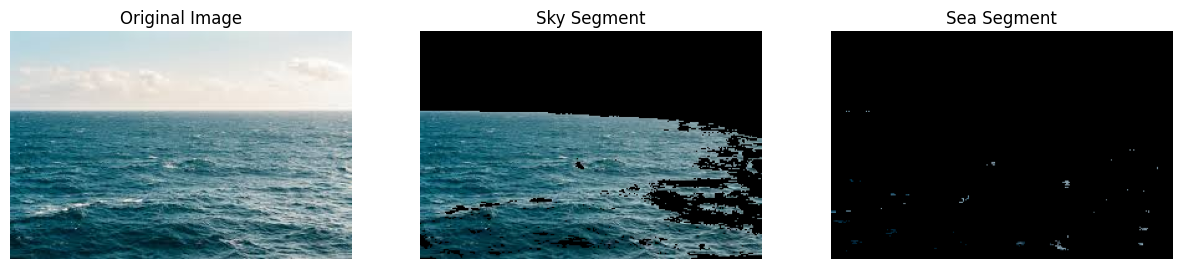

In [23]:
# Load the image
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg'  
img = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges for segmentation
# Sky color range in HSV
lower_sky = np.array([90, 50, 50])
upper_sky = np.array([150, 255, 255])

# Sea color range in HSV 
lower_sea = np.array([100, 50, 50])
upper_sea = np.array([140, 255, 255])

# Create masks for sky and sea
mask_sky = cv2.inRange(hsv_img, lower_sky, upper_sky)
mask_sea = cv2.inRange(hsv_img, lower_sea, upper_sea)

# Apply masks to the original image
sky_segment = cv2.bitwise_and(img, img, mask=mask_sky)
sea_segment = cv2.bitwise_and(img, img, mask=mask_sea)

# Convert segments to RGB for displaying with matplotlib
sky_segment_rgb = cv2.cvtColor(sky_segment, cv2.COLOR_BGR2RGB)
sea_segment_rgb = cv2.cvtColor(sea_segment, cv2.COLOR_BGR2RGB)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sky segment
axes[1].imshow(sky_segment_rgb)
axes[1].set_title('Sky Segment')
axes[1].axis('off')

# Sea segment
axes[2].imshow(sea_segment_rgb)
axes[2].set_title('Sea Segment')
axes[2].axis('off')

plt.show()


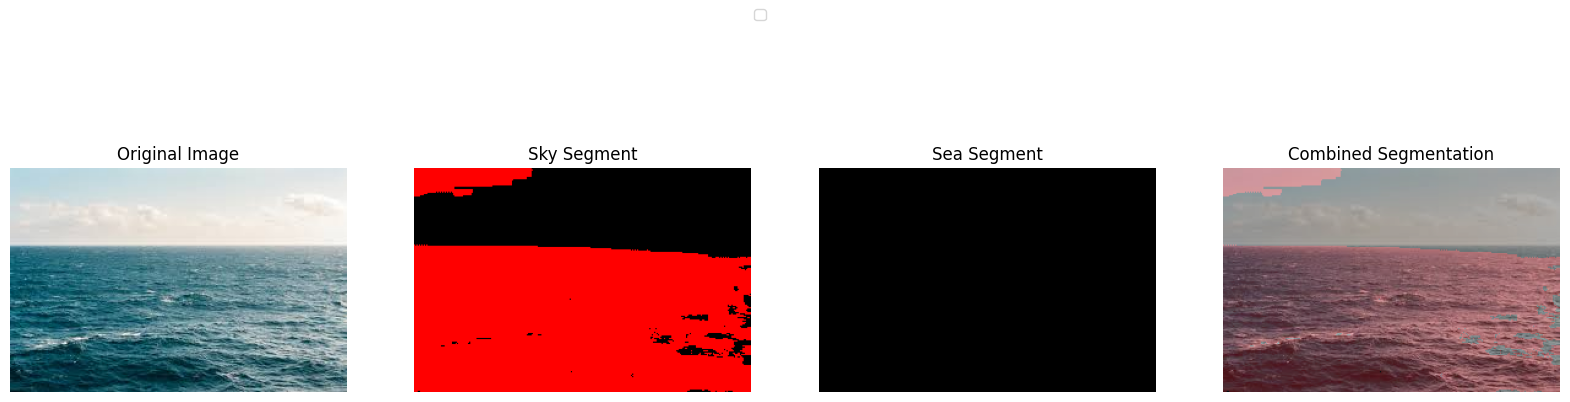

In [24]:
# Load the image
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg'  
img = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges for segmentation
# Sky color range in HSV
lower_sky = np.array([30, 30, 30])
upper_sky = np.array([1000, 2500, 2550])

# Sea color range in HSV (approximate, adjust as needed)
lower_sea = np.array([500, 50, 50])
upper_sea = np.array([300, 255, 255])

# Create masks for sky and sea
mask_sky = cv2.inRange(hsv_img, lower_sky, upper_sky)
mask_sea = cv2.inRange(hsv_img, lower_sea, upper_sea)

# Create colored masks for visualization
sky_color = np.zeros_like(img)
sky_color[mask_sky > 0] = [0, 0, 255]  # Red for sky

sea_color = np.zeros_like(img)
sea_color[mask_sea > 0] = [255, 0, 0]  # Blue for sea

# Overlay colored masks on original image
combined_segment = cv2.addWeighted(img, 0.7, sky_color, 0.3, 0)
combined_segment = cv2.addWeighted(combined_segment, 1.0, sea_color, 0.3, 0)

# Convert images to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
combined_segment_rgb = cv2.cvtColor(combined_segment, cv2.COLOR_BGR2RGB)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sky segment with color
axes[1].imshow(cv2.cvtColor(sky_color, cv2.COLOR_BGR2RGB))
axes[1].set_title('Sky Segment')
axes[1].axis('off')

# Sea segment with color
axes[2].imshow(cv2.cvtColor(sea_color, cv2.COLOR_BGR2RGB))
axes[2].set_title('Sea Segment')
axes[2].axis('off')

# Combined segmentation with color distinction
axes[3].imshow(combined_segment_rgb)
axes[3].set_title('Combined Segmentation')
axes[3].axis('off')

# Adding legends
fig.legend(['Original Image', 'Sky (Red)', 'Sea (Blue)', 'Combined Segmentation'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.show()


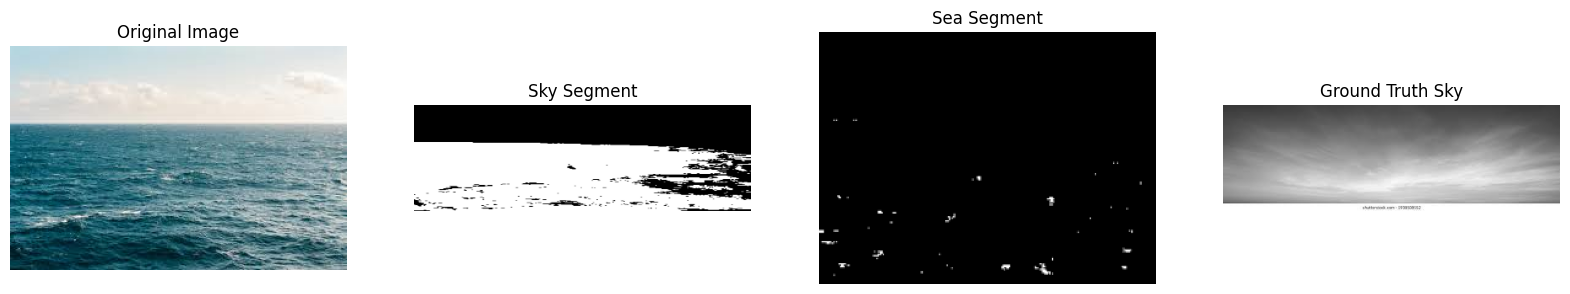

In [25]:
# Load the image and ground truth masks
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg' 
ground_truth_sky_path = 'C:/Users/Zayan Rashid/Desktop/sky.jpeg'  
ground_truth_sea_path = 'C:/Users/Zayan Rashid/Desktop/water.jpeg'  

img = cv2.imread(image_path)
ground_truth_sky = cv2.imread(ground_truth_sky_path, cv2.IMREAD_GRAYSCALE)
ground_truth_sea = cv2.imread(ground_truth_sea_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges for segmentation
lower_sky = np.array([90, 50, 50])
upper_sky = np.array([150, 255, 255])
lower_sea = np.array([100, 50, 50])
upper_sea = np.array([140, 255, 255])

# Create masks for sky and sea
mask_sky = cv2.inRange(hsv_img, lower_sky, upper_sky)
mask_sea = cv2.inRange(hsv_img, lower_sea, upper_sea)

# Resize masks to match the ground truth dimensions
mask_sky_resized = cv2.resize(mask_sky, (ground_truth_sky.shape[1], ground_truth_sky.shape[0]))
mask_sea_resized = cv2.resize(mask_sea, (ground_truth_sea.shape[1], ground_truth_sea.shape[0]))

# Calculate accuracy
def calculate_accuracy(pred_mask, gt_mask):
    correct_pixels = np.sum(pred_mask == gt_mask)
    total_pixels = gt_mask.size
    accuracy = correct_pixels / total_pixels
    return accuracy

# Calculate accuracy for sky and sea
sky_accuracy = calculate_accuracy(mask_sky_resized, ground_truth_sky)
sea_accuracy = calculate_accuracy(mask_sea_resized, ground_truth_sea)



# Optionally, plot the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sky segment
axes[1].imshow(cv2.cvtColor(mask_sky_resized, cv2.COLOR_GRAY2RGB))
axes[1].set_title('Sky Segment')
axes[1].axis('off')

# Sea segment
axes[2].imshow(cv2.cvtColor(mask_sea_resized, cv2.COLOR_GRAY2RGB))
axes[2].set_title('Sea Segment')
axes[2].axis('off')

# Ground truth masks
axes[3].imshow(cv2.cvtColor(ground_truth_sky, cv2.COLOR_GRAY2RGB))
axes[3].set_title('Ground Truth Sky')
axes[3].axis('off')

plt.show()


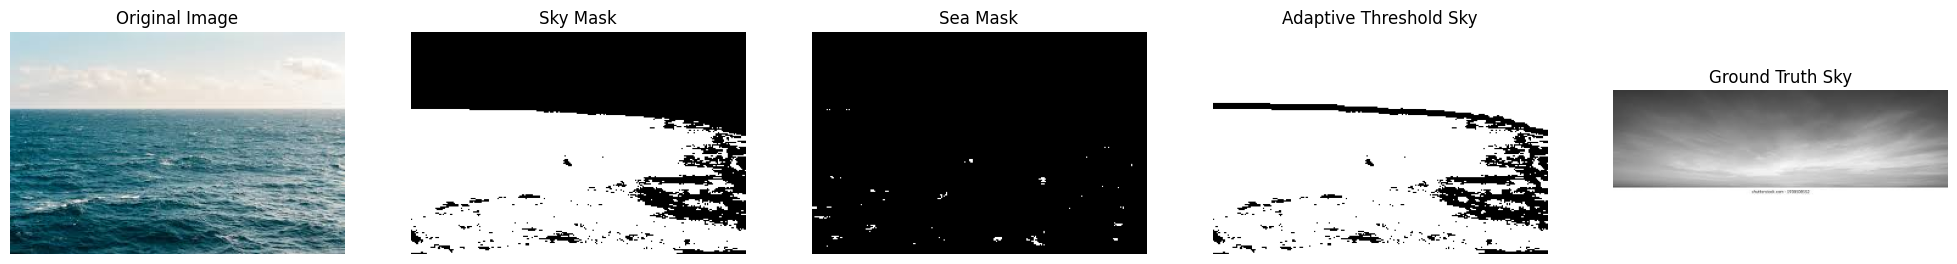

In [26]:
# Load the image and ground truth masks
image_path = 'C:/Users/Zayan Rashid/Desktop/sea.jpeg' 
ground_truth_sky_path = 'C:/Users/Zayan Rashid/Desktop/sky.jpeg'  
ground_truth_sea_path = 'C:/Users/Zayan Rashid/Desktop/water.jpeg'
img = cv2.imread(image_path)
ground_truth_sky = cv2.imread(ground_truth_sky_path, cv2.IMREAD_GRAYSCALE)
ground_truth_sea = cv2.imread(ground_truth_sea_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define HSV color ranges for segmentation (adjust as needed)
lower_sky = np.array([90, 50, 50])
upper_sky = np.array([150, 255, 255])
lower_sea = np.array([100, 50, 50])
upper_sea = np.array([140, 255, 255])

# Create masks for sky and sea
mask_sky = cv2.inRange(hsv_img, lower_sky, upper_sky)
mask_sea = cv2.inRange(hsv_img, lower_sea, upper_sea)

# Apply adaptive thresholding
adaptive_threshold_sky = cv2.adaptiveThreshold(mask_sky, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_threshold_sea = cv2.adaptiveThreshold(mask_sea, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Resize masks to match ground truth dimensions
mask_sky_resized = cv2.resize(adaptive_threshold_sky, (ground_truth_sky.shape[1], ground_truth_sky.shape[0]))
mask_sea_resized = cv2.resize(adaptive_threshold_sea, (ground_truth_sea.shape[1], ground_truth_sea.shape[0]))

# Calculate accuracy
def calculate_accuracy(pred_mask, gt_mask):
    correct_pixels = np.sum(pred_mask == gt_mask)
    total_pixels = gt_mask.size
    accuracy = correct_pixels / total_pixels
    return accuracy

sky_accuracy = calculate_accuracy(mask_sky_resized, ground_truth_sky)
sea_accuracy = calculate_accuracy(mask_sea_resized, ground_truth_sea)


# Display intermediate results for verification
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Original image
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sky mask
axes[1].imshow(cv2.cvtColor(mask_sky, cv2.COLOR_GRAY2RGB))
axes[1].set_title('Sky Mask')
axes[1].axis('off')

# Sea mask
axes[2].imshow(cv2.cvtColor(mask_sea, cv2.COLOR_GRAY2RGB))
axes[2].set_title('Sea Mask')
axes[2].axis('off')

# Adaptive threshold sky
axes[3].imshow(cv2.cvtColor(adaptive_threshold_sky, cv2.COLOR_GRAY2RGB))
axes[3].set_title('Adaptive Threshold Sky')
axes[3].axis('off')

# Ground truth masks
axes[4].imshow(cv2.cvtColor(ground_truth_sky, cv2.COLOR_GRAY2RGB))
axes[4].set_title('Ground Truth Sky')
axes[4].axis('off')

plt.show()
